## **Project Name:** Petrol Price Forecasting  using Auto-Keras

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df1 = pd.read_csv("train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis and splitting the data**

In [4]:
df1.head()
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [5]:
df2 = df1.dropna()

In [6]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

C:\Users\Farzan Nawaz\AppData\Local\Temp\ipykernel_15444\2446066184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


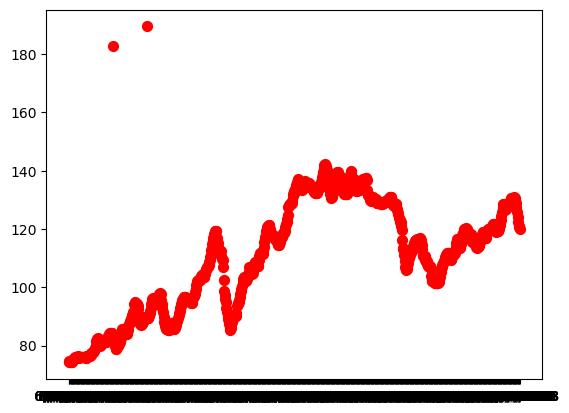

In [7]:
plt.scatter(df2.Date, df2.Petrol,color='red',label='Prices', s=50)

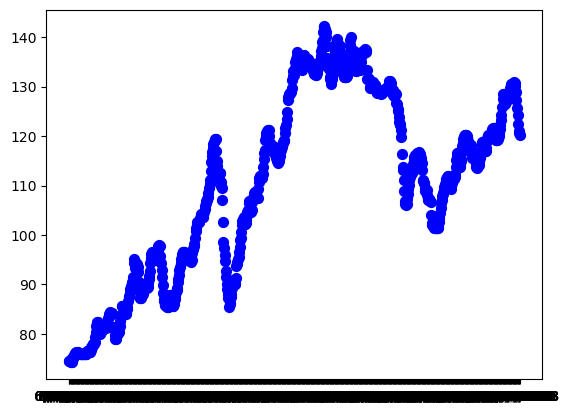

In [8]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='blue',label='Prices', s=50)

In [9]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [11]:
df4

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [12]:
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [13]:
train_data.shape
test_data.shape

(284, 1)

**Data Preprocessing**

In [14]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
X_train

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.91024132, 0.91597999, 0.90847557, ..., 0.88419659, 0.88655091,
        0.88743378],
       [0.91597999, 0.90847557, 0.88802237, ..., 0.88655091, 0.88743378,
        0.87154208],
       [0.90847557, 0.88802237, 0.88449088, ..., 0.88743378, 0.87154208,
        0.87639788]])

In [17]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [18]:
print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

# Using Auto ML

 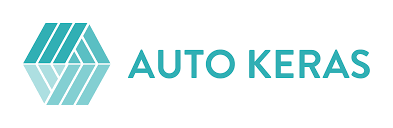

In [19]:
# Installing Auto Keras
# !pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1
# !pip install autokeras
# !pip show autokeras

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf


import autokeras as ak

In [21]:
reg = ak.StructuredDataRegressor(overwrite=True, max_trials=3)

In [22]:
reg.fit(x=X_train, y=y_train, verbose=0)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
INFO:tensorflow:Oracle triggered exit
Epoch 1/8
14/14 [==============================] - 1s 1ms/step - loss: 1.6778 - mean_squared_error: 1.6778
Epoch 2/8
14/14 [==============================] - 0s 1ms/step - loss: 0.7332 - mean_squared_error: 0.7332
Epoch 3/8
14/14 [==============================] - 0s 1ms/step - loss: 0.1733 - mean_squared_error: 0.1733
Epoch 4/8
14/14 [==============================] - 0s 1ms/step - loss: 0.1509 - mean_squared_error: 0.1509
Epoch 5/8
14/14 [==============================] - 0s 1ms/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 6/8
14/14 [==============================] - 0s 1ms/step - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 7/8
14/14 [==============================] - 0s 1ms/step - loss: 0.0631 - mean_squared_error: 0.0631
Epoch 8/8
14

INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


In [23]:

# evaluate the model
mae, _  = reg.evaluate(X_test, ytest, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()


6/6 [==============================] - 0s 1ms/step


In [24]:
# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 multi_category_encoding (Mu  (None, 100)              0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 100)              201       
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [25]:
yhat_train= reg.predict(X_train)

14/14 [==============================] - 0s 846us/step


In [26]:
train_predict=scaler.inverse_transform(yhat_train)
test_predict=scaler.inverse_transform(yhat_test)

In [27]:
from sklearn.metrics import mean_squared_error

In [29]:
print('MSE_Train:',mean_squared_error(y_train,train_predict))
print('MSE_Test:',mean_squared_error(ytest,test_predict))

MSE_Train: 11964.195077290815
MSE_Test: 7825.245703314823
